In [10]:
import functools
import matplotlib.pyplot as plt
import numpy as np
import torch
import seaborn as sns

from network import Net, NetDiscovery
from diff_equations import *

DEVICE = torch.device('mps' if torch.cuda.is_available() else 'cpu')

sns.set_theme()
torch.manual_seed(42)


Text(0.5, 0, 'Time (s)')

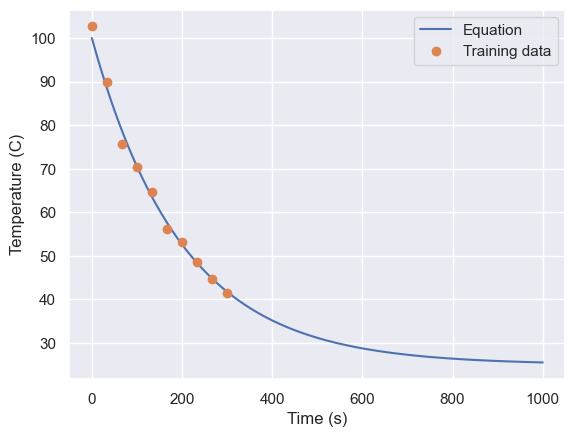

In [11]:
np.random.seed(10)

Tenv = 25
T0 = 100
R = 0.005
times = np.linspace(0, 1000, 1000)
eq = functools.partial(cooling_law, Tenv=Tenv, T0=T0, R=R)
temps = eq(times)

# Make training data
t = np.linspace(0, 300, 10)
T = eq(t) +  2 * np.random.randn(10)

plt.plot(times, temps)
plt.plot(t, T, 'o')
plt.legend(['Equation', 'Training data'])
plt.ylabel('Temperature (C)')
plt.xlabel('Time (s)')


# Traditional Networks

Epoch 0/20000, loss: 4713.87
Epoch 2000/20000, loss: 2510.98
Epoch 4000/20000, loss: 2155.99
Epoch 6000/20000, loss: 758.40
Epoch 8000/20000, loss: 97.00
Epoch 10000/20000, loss: 3.24
Epoch 12000/20000, loss: 0.66
Epoch 14000/20000, loss: 0.46
Epoch 16000/20000, loss: 0.41
Epoch 18000/20000, loss: 0.36


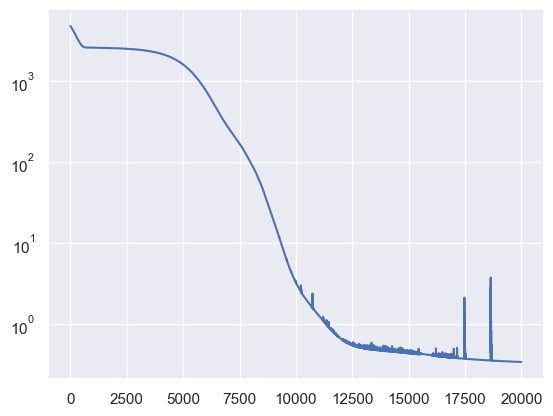

In [12]:
net = Net(1,1, loss2=None, epochs=20000, lr=1e-5).to(DEVICE)

losses = net.fit(t, T)

plt.plot(losses)
plt.yscale('log')

In [13]:
def l2_reg(model: torch.nn.Module):
    return torch.sum(sum([p.pow(2.) for p in model.parameters()]))

Epoch 0/20000, loss: 11219.99
Epoch 2000/20000, loss: 3918.60
Epoch 4000/20000, loss: 2575.86
Epoch 6000/20000, loss: 1639.64
Epoch 8000/20000, loss: 1442.32
Epoch 10000/20000, loss: 1051.68
Epoch 12000/20000, loss: 952.87
Epoch 14000/20000, loss: 882.26
Epoch 16000/20000, loss: 811.59
Epoch 18000/20000, loss: 753.32


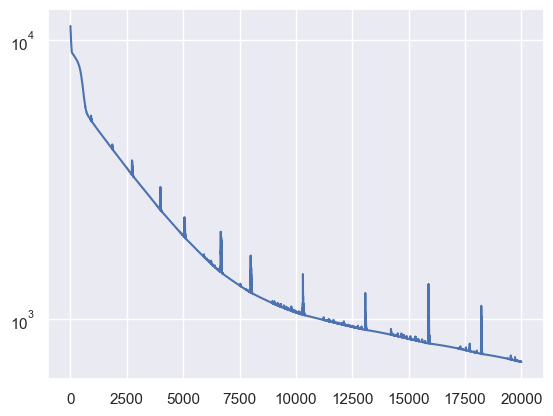

In [14]:
netreg = Net(1,1, loss2=l2_reg, epochs=20000, lr=1e-4, loss2_weight=1).to(DEVICE)

losses = netreg.fit(t, T)

plt.plot(losses)
plt.yscale('log')

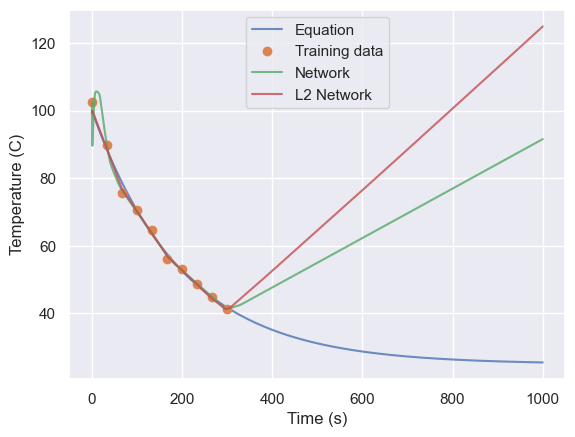

In [15]:
predsreg = netreg.predict(times)

preds = net.predict(times)
plt.plot(times, temps, alpha=0.8)
plt.plot(t, T, 'o')
plt.plot(times, preds, alpha=0.8)
plt.plot(times, predsreg, alpha=0.8)

plt.legend(labels=['Equation','Training data', 'Network', 'L2 Network'])
plt.ylabel('Temperature (C)')
plt.xlabel('Time (s)')

del net
del netreg

Analyzing amount:10
Epoch 0/20000, loss: 4713.87
Epoch 2000/20000, loss: 2510.98
Epoch 4000/20000, loss: 2155.99
Epoch 6000/20000, loss: 758.40
Epoch 8000/20000, loss: 97.00
Epoch 10000/20000, loss: 3.24
Epoch 12000/20000, loss: 0.66
Epoch 14000/20000, loss: 0.46
Epoch 16000/20000, loss: 0.41
Epoch 18000/20000, loss: 0.36
Epoch 0/20000, loss: 11219.99
Epoch 2000/20000, loss: 3918.60
Epoch 4000/20000, loss: 2575.86
Epoch 6000/20000, loss: 1639.64
Epoch 8000/20000, loss: 1442.32
Epoch 10000/20000, loss: 1051.68
Epoch 12000/20000, loss: 952.87
Epoch 14000/20000, loss: 882.26
Epoch 16000/20000, loss: 811.59
Epoch 18000/20000, loss: 753.32


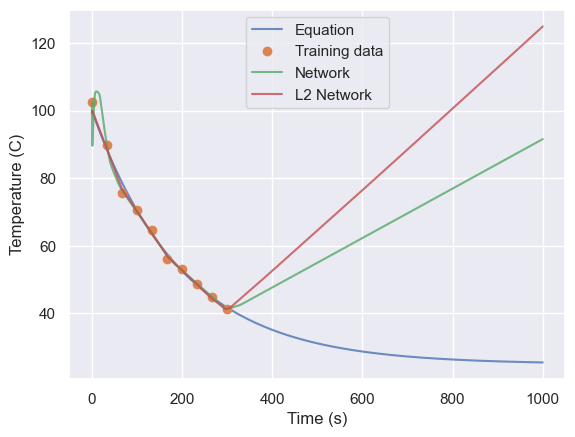

Analyzing amount:100
Epoch 0/20000, loss: 4613.69
Epoch 2000/20000, loss: 2148.60
Epoch 4000/20000, loss: 1759.27
Epoch 6000/20000, loss: 249.50
Epoch 8000/20000, loss: 22.08
Epoch 10000/20000, loss: 7.90
Epoch 12000/20000, loss: 5.37
Epoch 14000/20000, loss: 4.66
Epoch 16000/20000, loss: 4.14
Epoch 18000/20000, loss: 3.76
Epoch 0/20000, loss: 11113.98
Epoch 2000/20000, loss: 3615.02
Epoch 4000/20000, loss: 2088.31
Epoch 6000/20000, loss: 1237.42
Epoch 8000/20000, loss: 829.05
Epoch 10000/20000, loss: 666.41
Epoch 12000/20000, loss: 604.94
Epoch 14000/20000, loss: 567.46
Epoch 16000/20000, loss: 533.88
Epoch 18000/20000, loss: 503.36


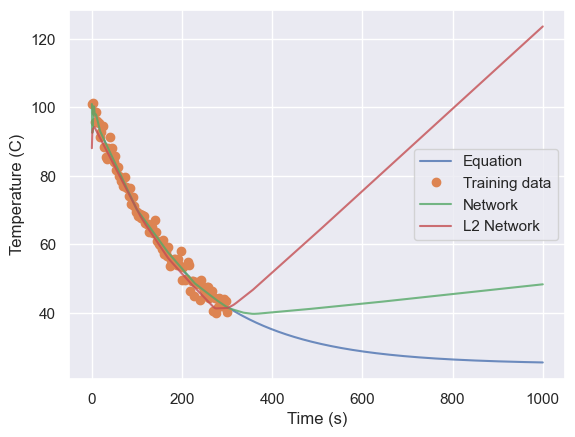

Analyzing amount:500
Epoch 0/20000, loss: 4412.44
Epoch 2000/20000, loss: 2092.46
Epoch 4000/20000, loss: 1654.64
Epoch 6000/20000, loss: 115.11
Epoch 8000/20000, loss: 5.35
Epoch 10000/20000, loss: 3.93
Epoch 12000/20000, loss: 3.63
Epoch 14000/20000, loss: 3.50
Epoch 16000/20000, loss: 3.43
Epoch 18000/20000, loss: 3.38
Epoch 0/20000, loss: 11457.07
Epoch 2000/20000, loss: 4158.10
Epoch 4000/20000, loss: 2546.92
Epoch 6000/20000, loss: 1637.46


In [ ]:
np.random.seed(10)
torch.manual_seed(42)
list_amount_training_data=[10,100,500,1000]
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

for amount_training_data in list_amount_training_data:
    
    print(color.BOLD + 'Analyzing amount:{}'.format(amount_training_data) + color.END)
    t = np.linspace(0, 300, amount_training_data)
    T = eq(t) +  2 * np.random.randn(amount_training_data)

    net = Net(1,1, loss2=None, epochs=20000, lr=1e-5).to(DEVICE)
    net.fit(t, T)
    preds = net.predict(times)
    netreg = Net(1,1, loss2=l2_reg, epochs=20000, lr=1e-4, loss2_weight=1).to(DEVICE)
    netreg.fit(t, T)
    predsreg = netreg.predict(times)

    plt.plot(times, temps, alpha=0.8)
    plt.plot(t, T, 'o')
    plt.plot(times, preds, alpha=0.8)
    plt.plot(times, predsreg, alpha=0.8)

    plt.legend(labels=['Equation','Training data', 'Network', 'L2 Network'])
    plt.ylabel('Temperature (C)')
    plt.xlabel('Time (s)')
    
    plt.show()
    
    del net
    del netreg


### Solution exercise 3:

The loss function used by the PINN include also information about the physics of the phenomenon.
For this reason the PINN is able to generalize more on data that are outside the learning range. The PINN will also learn the physical law that regulate the behaviour of the data.

# PINN

In [6]:
def physics_loss(model: torch.nn.Module):
    ts = torch.linspace(0, 1000, steps=1000,).view(-1,1).requires_grad_(True).to(DEVICE)
    temps = model(ts)
    dT = grad(temps, ts)[0]
    pde = R*(Tenv - temps) - dT
    
    return torch.mean(pde**2)

Epoch 0/30000, loss: 4713.90
Epoch 3000/30000, loss: 2461.18
Epoch 6000/30000, loss: 845.20
Epoch 9000/30000, loss: 2.84
Epoch 12000/30000, loss: 0.45
Epoch 15000/30000, loss: 0.41
Epoch 18000/30000, loss: 0.37
Epoch 21000/30000, loss: 0.34
Epoch 24000/30000, loss: 0.36
Epoch 27000/30000, loss: 0.33


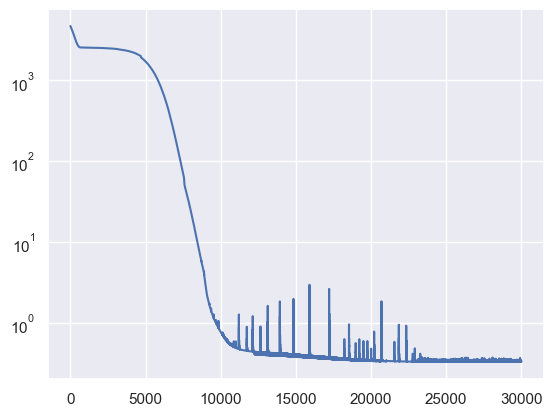

In [ ]:
np.random.seed(10)
torch.manual_seed(42)
t = np.linspace(0, 300, 10)
T = eq(t) +  2 * np.random.randn(10)
net = Net(1,1, loss2=physics_loss, epochs=30000, loss2_weight=1, lr=1e-5).to(DEVICE)

losses = net.fit(t, T)
plt.plot(losses)
plt.yscale('log')

Text(0.5, 0, 'Time (s)')

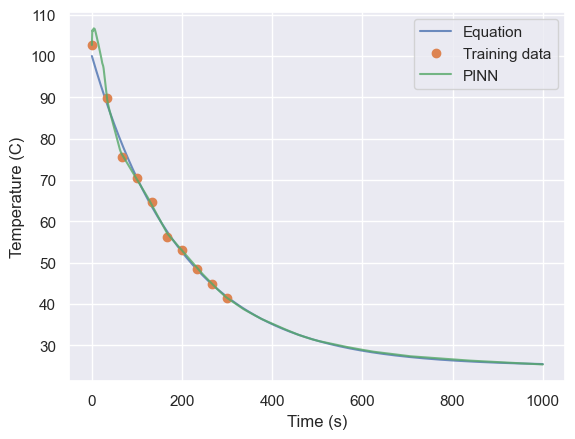

In [10]:
preds = net.predict(times)

plt.plot(times, temps, alpha=0.8)
plt.plot(t, T, 'o')
plt.plot(times, preds, alpha=0.8)
plt.legend(labels=['Equation','Training data', 'PINN'])
plt.ylabel('Temperature (C)')
plt.xlabel('Time (s)')

In [ ]:
np.random.seed(10)
torch.manual_seed(42)
list_amount_training_data=[10,100,500,1000]
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

for amount_training_data in list_amount_training_data:
    
    print(color.BOLD + 'Analyzing amount:{}'.format(amount_training_data) + color.END)
    t = np.linspace(0, 300, amount_training_data)
    T = eq(t) +  2 * np.random.randn(amount_training_data)

    net = Net(1,1, loss2=None, epochs=20000, lr=1e-5).to(DEVICE)
    net.fit(t, T)
    preds = net.predict(times)
    netreg = Net(1,1, loss2=l2_reg, epochs=20000, lr=1e-4, loss2_weight=1).to(DEVICE)
    netreg.fit(t, T)
    predsreg = netreg.predict(times)
    netpin = Net(1,1, loss2=physics_loss, epochs=30000, lr=1e-5, loss2_weight=1).to(DEVICE)
    netpin.fit(t, T)
    predspin=netpin.predict(times)

    plt.plot(times, temps, alpha=0.8)
    plt.plot(t, T, 'o')
    plt.plot(times, preds, alpha=0.8)
    plt.plot(times, predsreg, alpha=0.8)
    plt.plot(times, predspin, alpha=0.8)

    plt.legend(labels=['Equation','Training data', 'Network', 'L2 Network', 'PINN'])
    plt.ylabel('Temperature (C)')
    plt.xlabel('Time (s)')
    
    plt.show()
    
    del net
    del netreg


Analyzing amount:10
Epoch 0/20000, loss: 4713.87
Epoch 2000/20000, loss: 2511.34
Epoch 4000/20000, loss: 2151.19
Epoch 6000/20000, loss: 725.38
Epoch 8000/20000, loss: 83.17
Epoch 10000/20000, loss: 2.31
Epoch 12000/20000, loss: 0.54
Epoch 14000/20000, loss: 0.43
Epoch 16000/20000, loss: 0.38
Epoch 18000/20000, loss: 0.35
Epoch 0/20000, loss: 11219.99
Epoch 2000/20000, loss: 3894.54
Epoch 4000/20000, loss: 2419.43
Epoch 6000/20000, loss: 1595.69
Epoch 8000/20000, loss: 1203.40
Epoch 10000/20000, loss: 1013.50
Epoch 12000/20000, loss: 921.09
Epoch 14000/20000, loss: 847.05
Epoch 16000/20000, loss: 777.02
Epoch 18000/20000, loss: 712.21
Epoch 0/30000, loss: 4775.84
Epoch 3000/30000, loss: 2436.63
Epoch 6000/30000, loss: 504.84
Epoch 9000/30000, loss: 0.92


# Parameter discovery

In [8]:
def physics_loss_discovery(model: torch.nn.Module):
    ts = torch.linspace(0, 1000, steps=1000,).view(-1,1).requires_grad_(True).to(DEVICE)
    temps = model(ts)
    dT = grad(temps, ts)[0]
    pde = model.r * (Tenv - temps) - dT
    
    return torch.mean(pde**2)

In [9]:
np.random.seed(10)
torch.manual_seed(42)
t = np.linspace(0, 300, 10)
T = eq(t) +  2 * np.random.randn(10)

netdisc = NetDiscovery(1, 1, loss2=physics_loss_discovery, 
                       loss2_weight=1, epochs=40000, lr= 5e-6).to(DEVICE)
print(netdisc.r)
losses = netdisc.fit(t, T)
plt.plot(losses)
plt.yscale('log')

Parameter containing:
tensor([0.], requires_grad=True)
Epoch 0/40000, loss: 4713.87


KeyboardInterrupt: 

In [ ]:
preds = netdisc.predict(times)
print("estimated r:{}".format(netdisc.r))


plt.plot(times, temps, alpha=0.8)
plt.plot(t, T, 'o')
plt.plot(times, preds, alpha=0.8)
plt.legend(labels=['Equation','Training data', 'discovery PINN'])
plt.ylabel('Temperature (C)')
plt.xlabel('Time (s)')

Epoch 0/40000, loss: 4713.87
Epoch 4000/40000, loss: 2527.80
Epoch 8000/40000, loss: 2268.62
Epoch 12000/40000, loss: 632.92
Epoch 16000/40000, loss: 29.28
Epoch 20000/40000, loss: 0.65
Epoch 24000/40000, loss: 0.51
Epoch 28000/40000, loss: 0.40
Epoch 32000/40000, loss: 0.34
Epoch 36000/40000, loss: 0.30


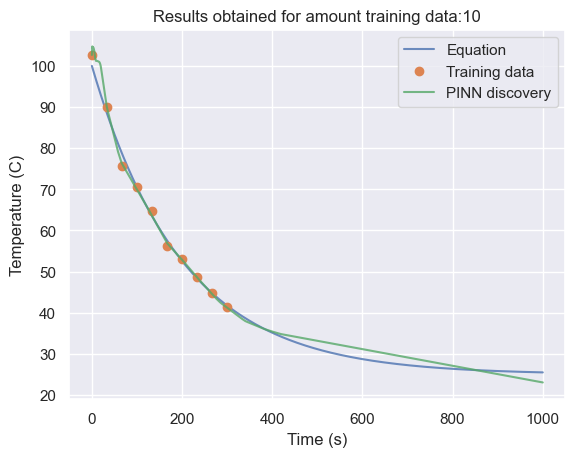

estimated r:Parameter containing:
tensor([0.0055], requires_grad=True)
real r:0.005
Epoch 0/40000, loss: 4457.54
Epoch 4000/40000, loss: 2129.44
Epoch 8000/40000, loss: 1334.79
Epoch 12000/40000, loss: 44.75
Epoch 16000/40000, loss: 8.06
Epoch 20000/40000, loss: 4.69
Epoch 24000/40000, loss: 3.69
Epoch 28000/40000, loss: 3.49
Epoch 32000/40000, loss: 3.48
Epoch 36000/40000, loss: 3.47


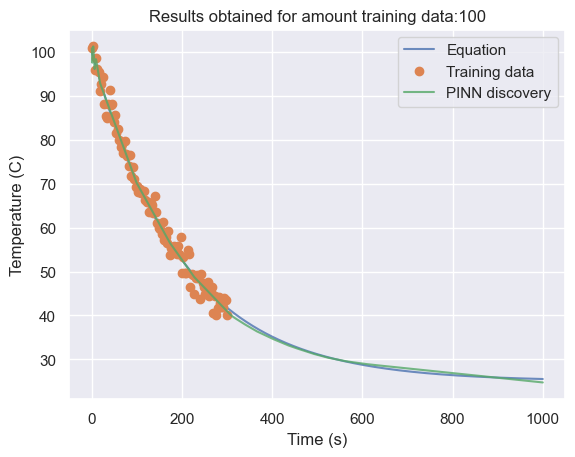

estimated r:Parameter containing:
tensor([0.0053], requires_grad=True)
real r:0.005
Epoch 0/40000, loss: 4587.89
Epoch 4000/40000, loss: 2106.36
Epoch 8000/40000, loss: 1714.13
Epoch 12000/40000, loss: 148.67
Epoch 16000/40000, loss: 16.94
Epoch 20000/40000, loss: 5.12
Epoch 24000/40000, loss: 3.66
Epoch 28000/40000, loss: 3.43
Epoch 32000/40000, loss: 3.39
Epoch 36000/40000, loss: 3.38


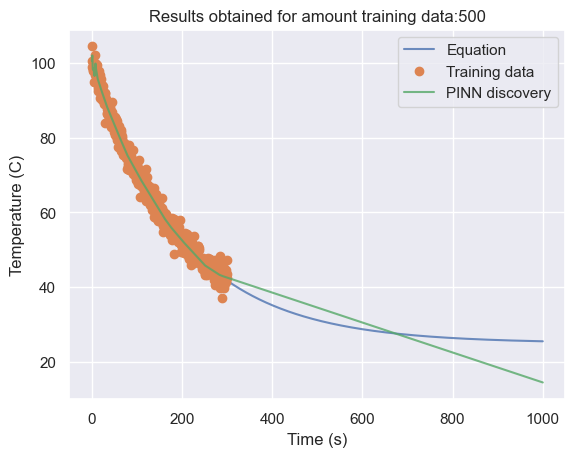

estimated r:Parameter containing:
tensor([0.0044], requires_grad=True)
real r:0.005
Epoch 0/40000, loss: 4615.71
Epoch 4000/40000, loss: 2083.63
Epoch 8000/40000, loss: 1653.66
Epoch 12000/40000, loss: 107.85
Epoch 16000/40000, loss: 7.58
Epoch 20000/40000, loss: 4.56
Epoch 24000/40000, loss: 3.94
Epoch 28000/40000, loss: 3.76
Epoch 32000/40000, loss: 3.71
Epoch 36000/40000, loss: 3.70


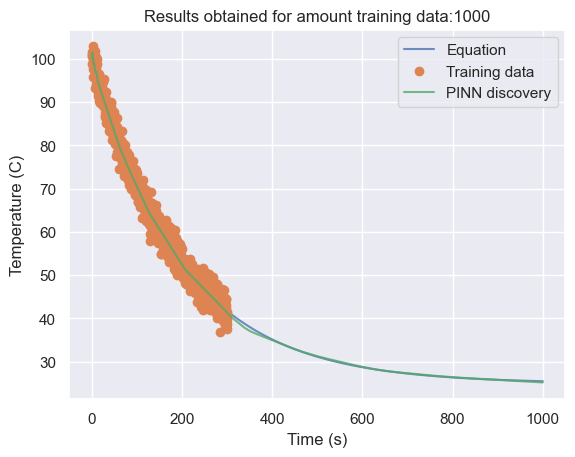

estimated r:Parameter containing:
tensor([0.0052], requires_grad=True)
real r:0.005


In [63]:
np.random.seed(10)
torch.manual_seed(42)
amount_training_data_list=[10,100,500,1000]

for amount_data in amount_training_data_list:
    t = np.linspace(0, 300, amount_data)
    T = eq(t) +  2 * np.random.randn(amount_data)
    net_physics =  NetDiscovery(1, 1, loss2=physics_loss_discovery, 
                                loss2_weight=1, epochs=40000, lr= 5e-6).to(DEVICE)
    net_physics.fit(t,T)
    preds_discovery=net_physics.predict(times)

    plt.plot(times, temps, alpha=0.8)
    plt.plot(t, T, 'o')
    plt.plot(times, preds_discovery, alpha=0.8)
    plt.title("Results obtained for amount training data:{}".format(amount_data))

    plt.legend(labels=['Equation','Training data', 'PINN discovery'])
    plt.ylabel('Temperature (C)')
    plt.xlabel('Time (s)')
    plt.show()
    
    print("estimated r:{}".format(net_physics.r))
    print("real r:{}".format(R))